In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA, PCA
from path import Path
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from lib.autoencoder import AutoEncoder
import lib.noisy as noisy
import tensorflow as tf
#from skimage.util import random_noise
#from skimage.util import random_noise

In [2]:
def recostruction_error(X, X_cap):
    return (np.power(np.sum(np.power((X-X_cap),2), axis = 1),1/2)).values

In [3]:
plt.style.use('ggplot')

In [4]:
PROJ_DIR = Path().getcwd().parent
DATA_DIR = PROJ_DIR / "data"
df = pd.read_csv(DATA_DIR / 'germany_energy.csv' )

In [5]:
df.tail()

Date  Consumption     Wind   Solar  Wind+Solar
4378  2017-12-27   1263.94091  394.507  16.530     411.037
4379  2017-12-28   1299.86398  506.424  14.162     520.586
4380  2017-12-29   1295.08753  584.277  29.854     614.131
4381  2017-12-30   1215.44897  721.247   7.467     728.714
4382  2017-12-31   1107.11488  721.176  19.980     741.156

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
Date           4383 non-null object
Consumption    4383 non-null float64
Wind           2920 non-null float64
Solar          2188 non-null float64
Wind+Solar     2187 non-null float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.describe()

Consumption         Wind        Solar   Wind+Solar
count  4383.000000  2920.000000  2188.000000  2187.000000
mean   1338.675836   164.814173    89.258695   272.663481
std     165.775710   143.692732    58.550099   146.319884
min     842.395000     5.757000     1.968000    21.478000
25%    1217.859000    62.353250    35.179250   172.185500
50%    1367.123000   119.098000    86.407000   240.991000
75%    1457.761000   217.900250   135.071500   338.988000
max    1709.568000   826.278000   241.580000   851.556000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0236864588>,
      dtype=object)

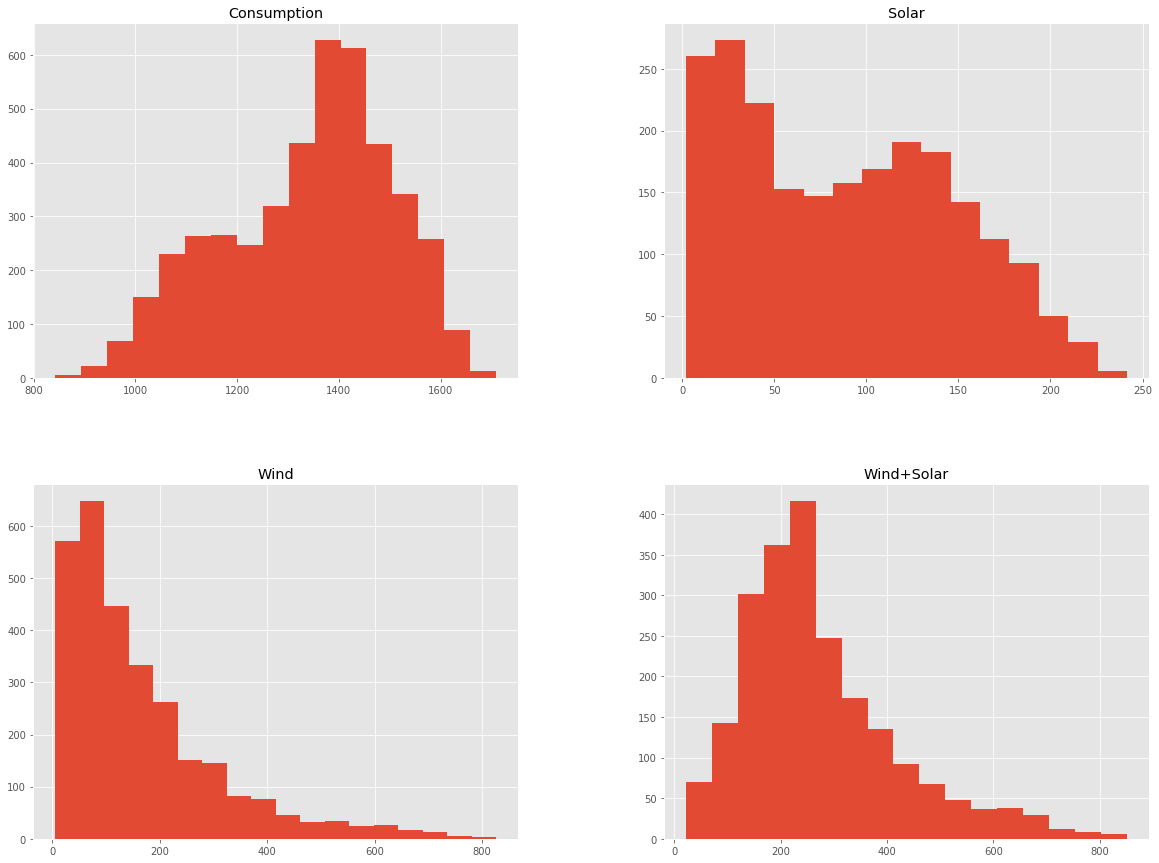

In [9]:
df.hist(bins='doane',figsize=(20,15))

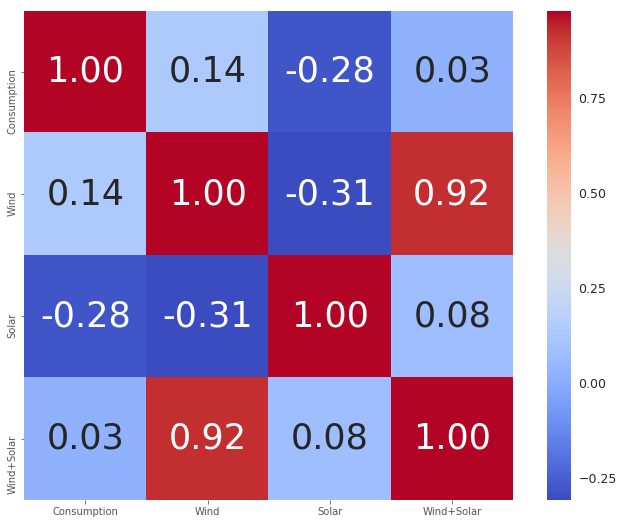

In [10]:
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
sns.heatmap(data=df.corr(), cmap='coolwarm',vmax=.98, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 35}, square=True)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


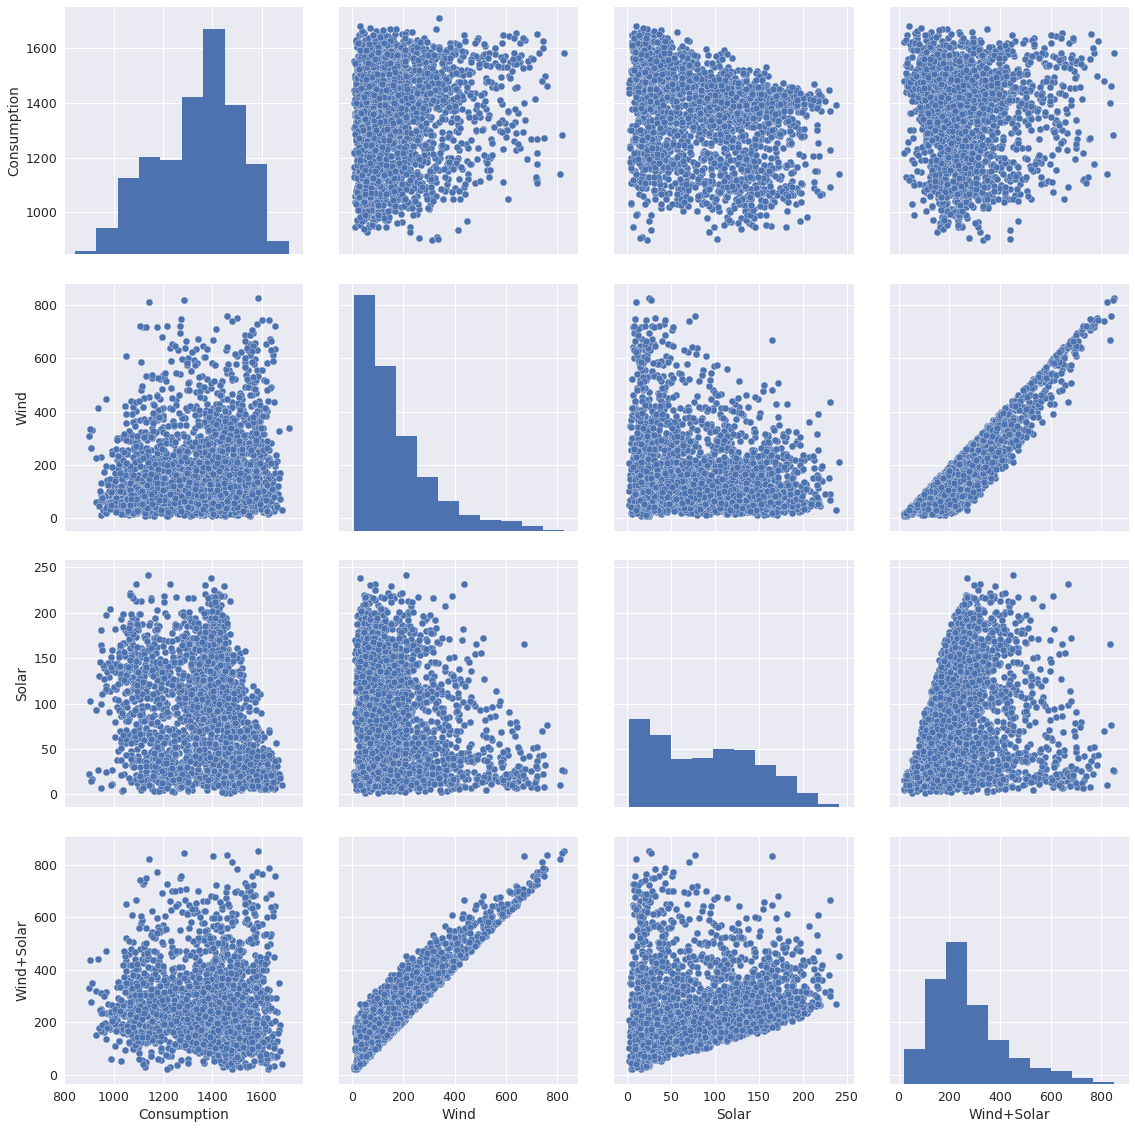

In [11]:
sns.pairplot(data=df, size=4)

In [12]:
#imputer = SimpleImputer(strategy="median")
#df_num = df.drop(columns=["Date"], axis=1)
#df_num = pd.DataFrame(data=imputer.fit_transform(df_num), columns=df_num.columns)


In [13]:
df = df.dropna()

In [14]:
Date = df["Date"]
df =df.loc[:,'Consumption':'Wind+Solar']

In [15]:
SC = StandardScaler()
df = pd.DataFrame(data = SC.fit_transform(df), columns=df.columns)
df['Date'] = Date.values


In [16]:
X_train = df[:int(df.shape[0]*0.7)]
X_test = df[int(df.shape[0]*0.7):]
X_train = X_train.set_index('Date')
X_test = X_test.set_index('Date')

In [17]:
#X_train['Year'] = X_train.index.year
#X_train['Month'] = X_train.index.month
#X_train['Weekday Name'] = X_train.index.weekday_name
#X_test['Year'] = X_test.index.year
#X_test['Month'] = X_test.index.month
#X_test['Weekday Name'] = X_test.index.weekday_name

In [18]:
X_train

Consumption      Wind     Solar  Wind+Solar
Date                                                   
2012-01-01    -2.398554  0.287131 -1.411850   -0.263944
2012-01-02    -0.468059  0.155815 -1.412072   -0.401695
2012-01-03    -0.076715  1.891267 -1.102777    1.541384
2012-01-04    -0.002300  2.062999 -1.273577    1.653069
2012-01-05     0.174995  2.219804 -1.437749    1.751759
2012-01-06    -0.338135  0.670554 -1.299561    0.182939
2012-01-07    -1.031936  1.205409 -1.454080    0.681810
2012-01-08    -1.466166  0.244003 -1.380195   -0.296490
2012-01-09     0.575642 -0.206024 -1.434451   -0.789974
2012-01-10     0.523153 -0.048494 -1.219833   -0.538953
2012-01-11     0.614059  0.091305 -1.339041   -0.440099
2012-01-12     0.570098  1.714286 -1.216484    1.310351
2012-01-13     0.335607  1.510700 -1.203587    1.102088
2012-01-14    -0.866922 -0.057004 -1.067022   -0.486727
2012-01-15    -1.180681 -0.971363 -0.898973   -1.378026
2012-01-16     0.842353 -0.854791 -0.846475   -1.234814
2012-01-17     1.024272 -0.697738 -0.994178   -1.129274
2012-01-18     0.908576  0.272792 -0.825258   -0.044252
2012-01-19     0.735959  0.646551 -1.458009    0.094373
2012-01-20     0.606768  0.406390 -1.267752   -0.081262
2012-01-21    -0.631854  1.052888 -1.469865    0.515602
2012-01-22    -1.364672  1.530699 -1.370748    1.056164
2012-01-23     0.642297 -0.442266 -1.324913   -0.993800
2012-01-24     0.879419 -0.981660 -1.272945   -1.538465
2012-01-25     0.905940 -0.880183 -1.061145   -1.347333
2012-01-26     0.817154  0.133892 -0.852386   -0.200719
2012-01-27     0.669304 -0.605201 -1.314526   -1.160453
2012-01-28    -0.549062 -1.018939 -1.358704   -1.611862
2012-01-29    -1.190752 -0.682238 -1.368680   -1.262882
2012-01-30     0.640495  0.016635 -1.156095   -0.445171
...                 ...       ...       ...         ...
2016-02-14    -0.715349  0.632336 -1.064664    0.236868
2016-02-15     1.311487  0.196851 -1.123380   -0.243156
2016-02-16     1.493815 -0.689691 -0.713379   -1.008477
2016-02-17     1.586720  0.093516 -0.768917   -0.209647
2016-02-18     1.421274 -0.663516 -0.438028   -0.870856
2016-02-19     1.370221 -0.385000 -0.919148   -0.771401
2016-02-20     0.116597  2.762537 -1.225112    2.405804
2016-02-21    -0.706899  2.978845 -1.139609    2.666779
2016-02-22     1.123748  2.312563 -0.668210    2.156930
2016-02-23     1.370935  0.720934 -0.879925    0.403671
2016-02-24     1.387601  0.445450 -0.257184    0.364063
2016-02-25     1.403497 -0.118306 -0.489176   -0.319766
2016-02-26     1.177287 -0.621288 -0.194283   -0.729052
2016-02-27    -0.198111 -0.446289  0.355222   -0.325714
2016-02-28    -0.754487  0.027473 -0.308007   -0.094448
2016-02-29     1.180632  0.407668 -0.782686    0.114177
2016-03-01     1.407113  0.416895 -0.705520    0.154727
2016-03-02     1.355399  1.150563 -0.947489    0.827025
2016-03-03     1.290311 -0.508250 -0.635940   -0.787281
2016-03-04     1.209195  0.645234 -0.259507    0.572572
2016-03-05    -0.179283 -0.647391 -0.813607   -1.004239
2016-03-06    -0.745640 -0.404862 -0.683807   -0.698052
2016-03-07     1.104470 -0.815197 -0.286516   -0.969239
2016-03-08     1.365164 -0.715389 -0.229440   -0.841770
2016-03-09     1.299133  0.382563  0.508648    0.604585
2016-03-10     1.196871 -0.373908  0.127483   -0.340965
2016-03-11     1.105623 -0.588645 -0.358864   -0.760689
2016-03-12    -0.159867 -0.617688 -0.451251   -0.828105
2016-03-13    -0.782737 -0.307514 -0.476244   -0.512942
2016-03-14     0.985471 -0.592035  0.737838   -0.325399

[1530 rows x 4 columns]

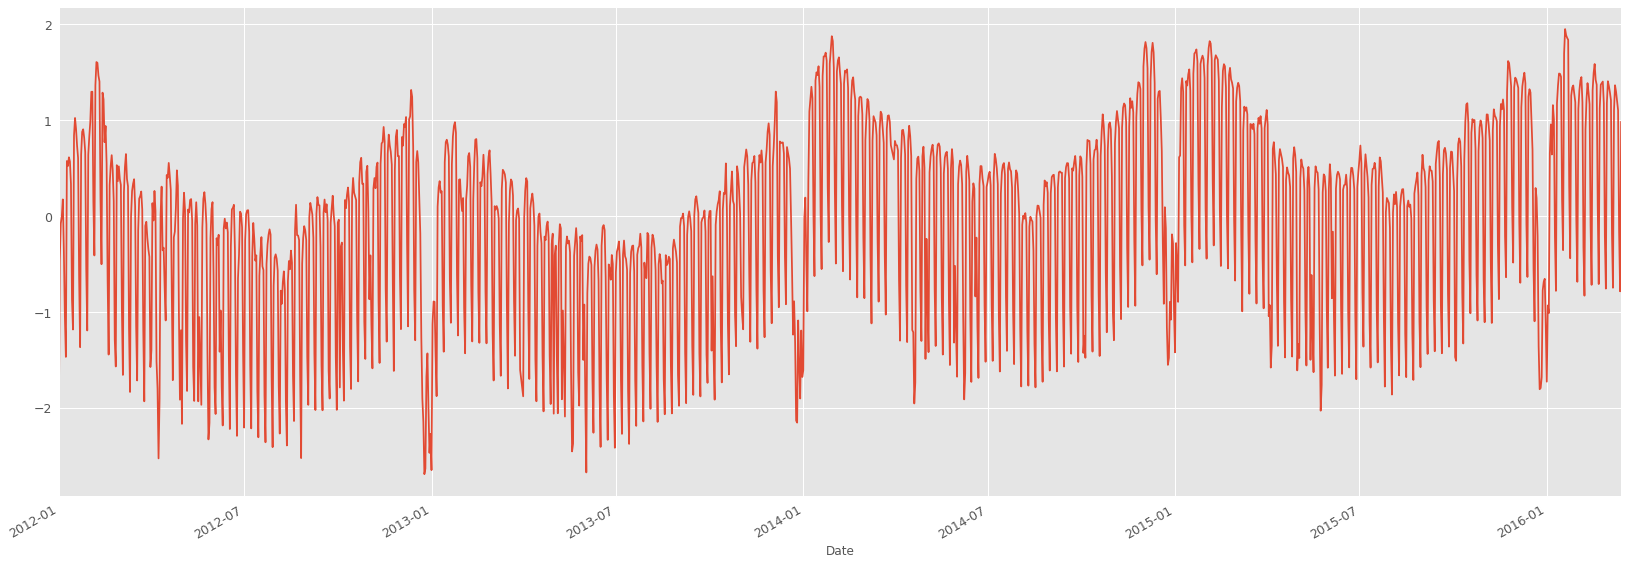

In [19]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(28,10))
    X_train['Consumption'].plot()

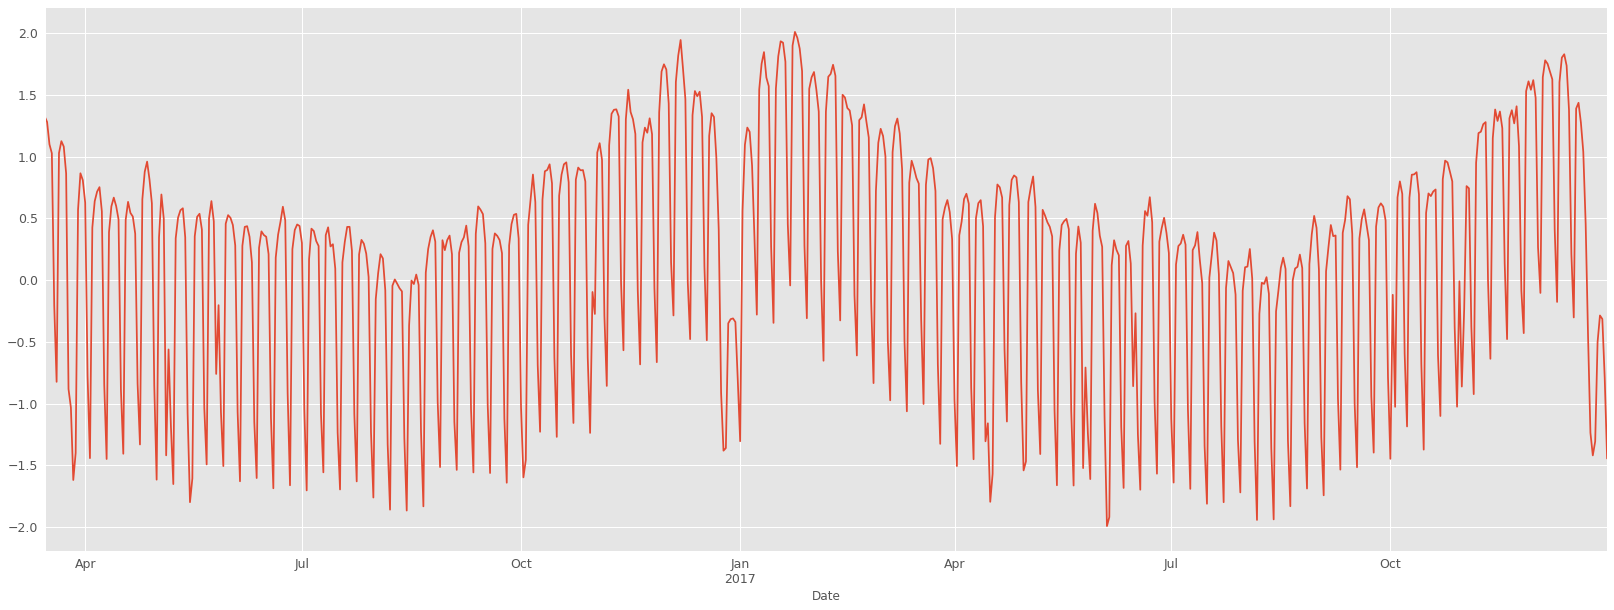

In [20]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(28,10))
    X_test['Consumption'].plot()

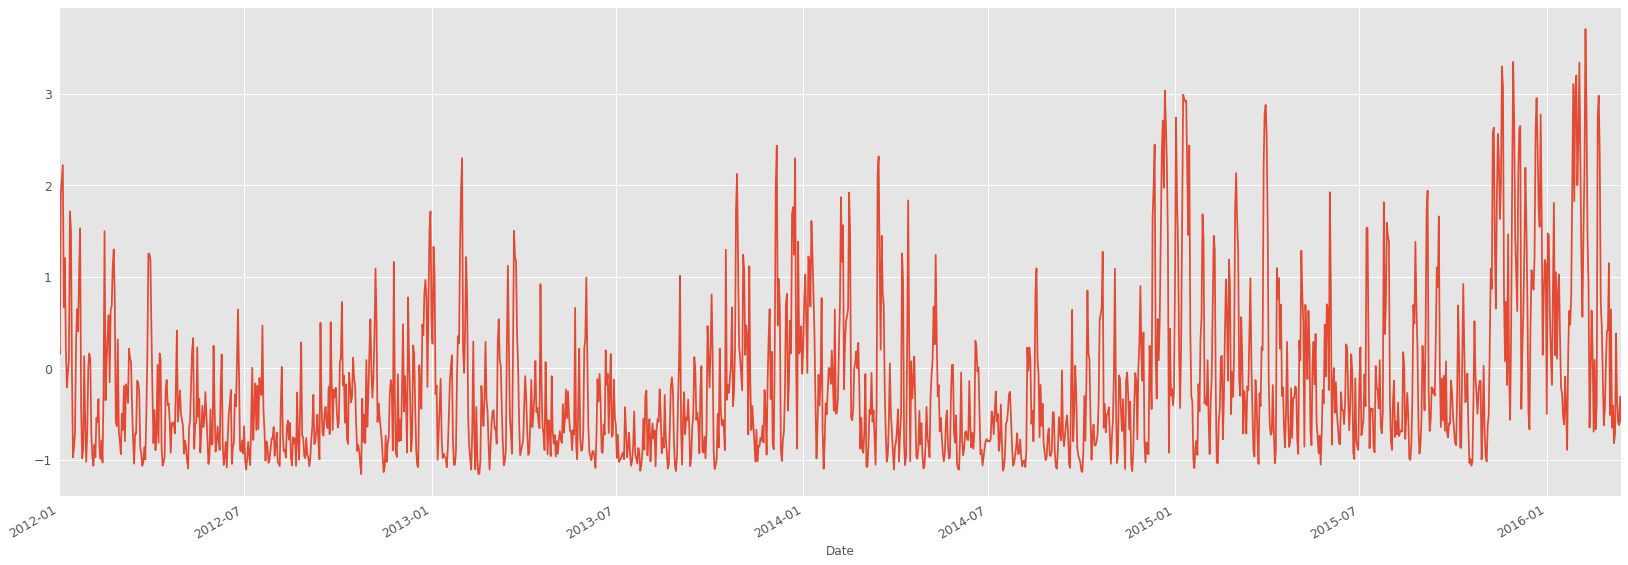

In [21]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(28,10))
    X_train['Wind'].plot()

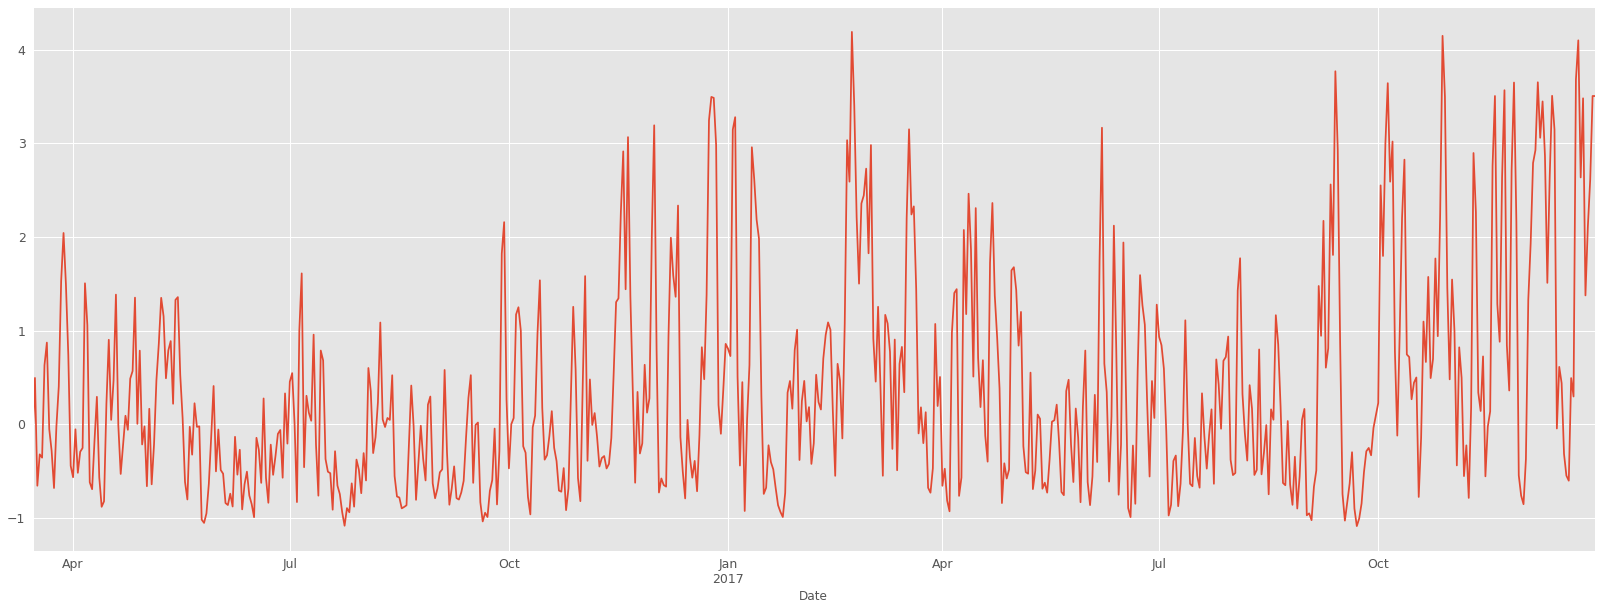

In [22]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(28,10))
    X_test['Wind'].plot()

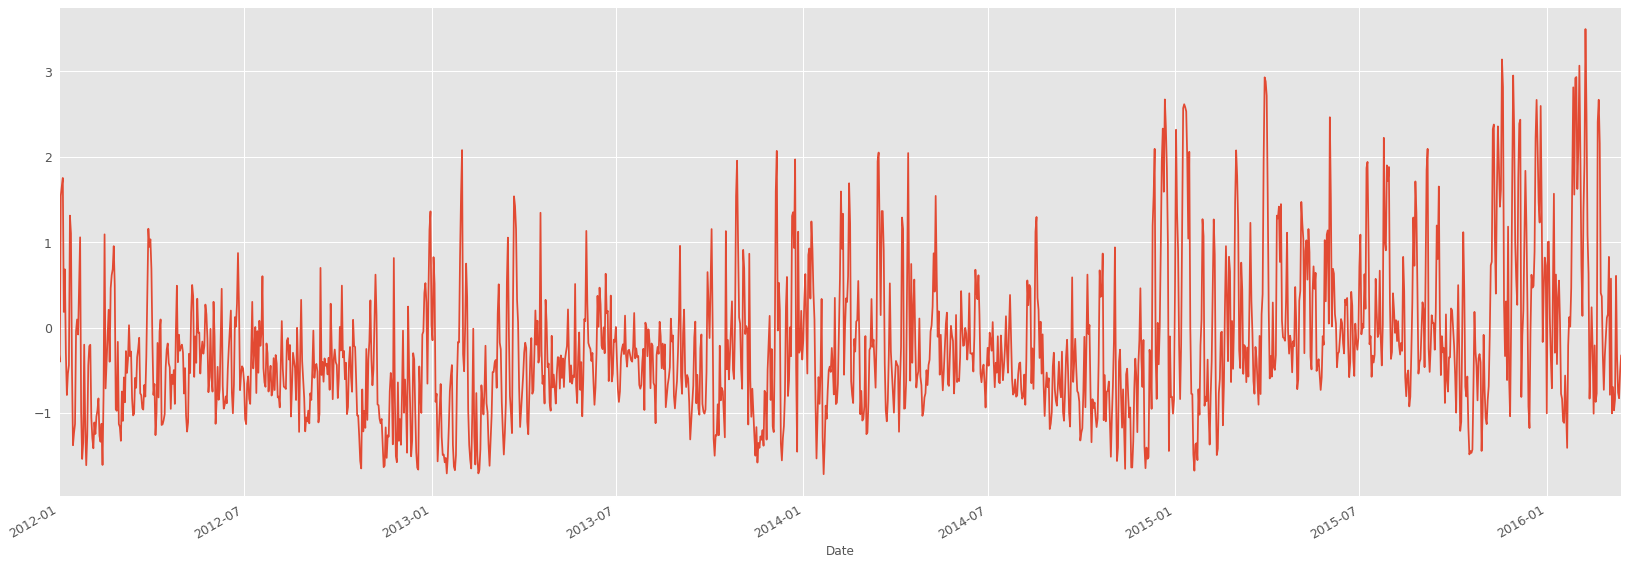

In [23]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(28,10))
    X_train['Wind+Solar'].plot()

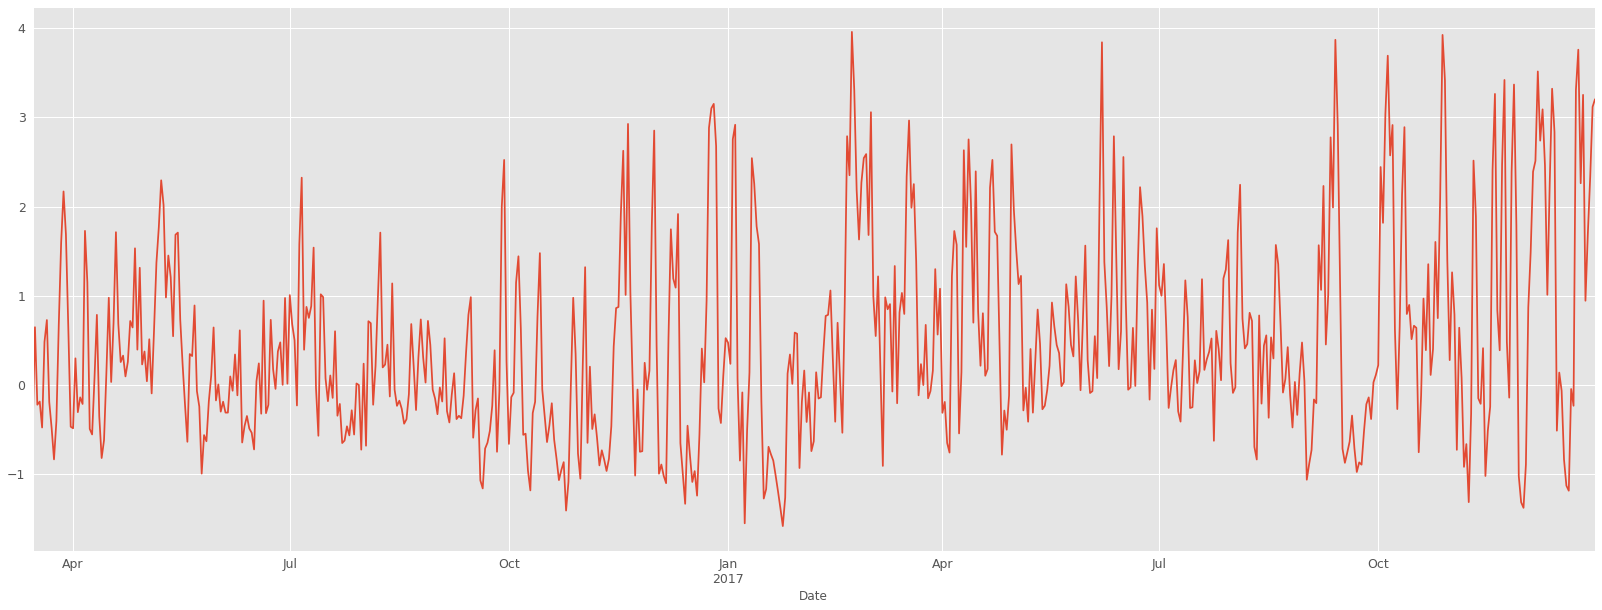

In [24]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(28,10))
    X_test['Wind+Solar'].plot()

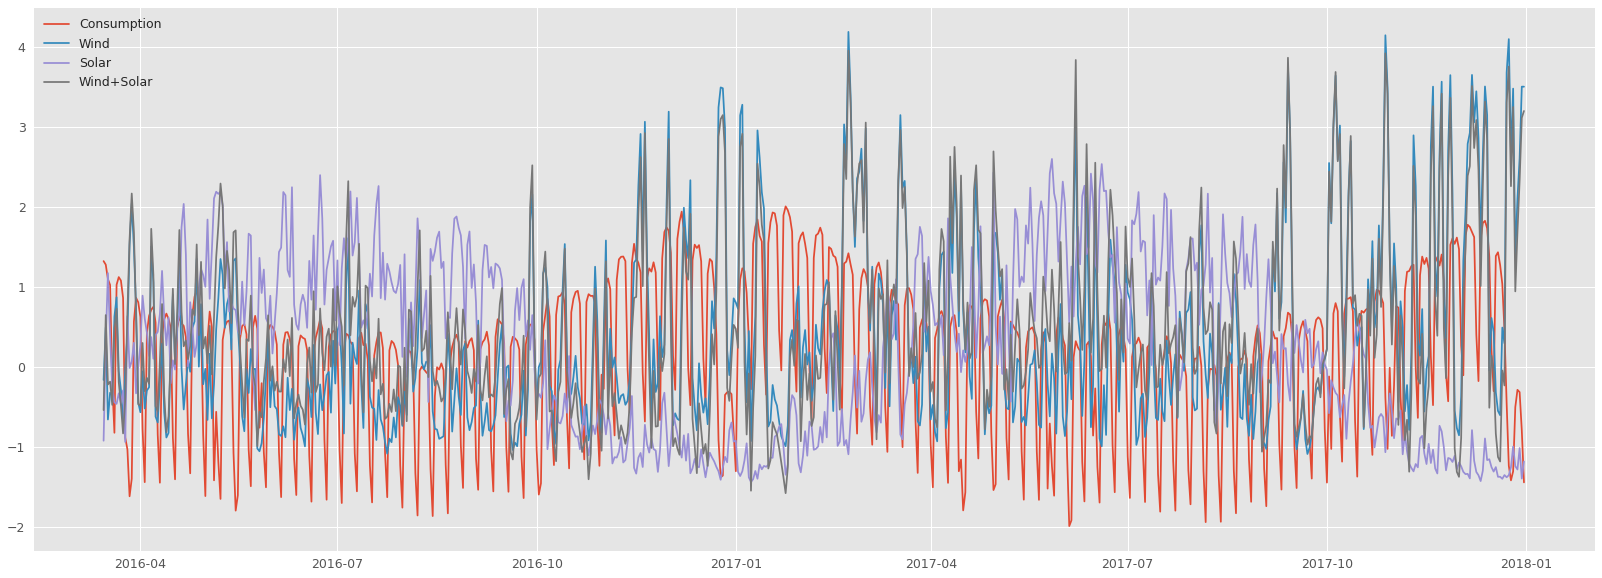

In [25]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(28,10))
    plt.plot(X_test)
    plt.legend(X_test)

In [26]:
#pd.date_range('1998-03', '1998-12', freq='2M')

In [27]:
PCA = PCA(n_components=3)
PCA.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
print("variance ratio: ", PCA.explained_variance_ratio_)
print("sum of variance percentage: ", round(sum(PCA.explained_variance_ratio_)*100))

variance ratio:  [0.44908746 0.34043075 0.2104818 ]
sum of variance percentage:  100.0


In [29]:
X_test_pca = PCA.transform(X_test)
X_projected_test = PCA.inverse_transform(X_test_pca)
error_e_test = recostruction_error(X_test, X_projected_test)

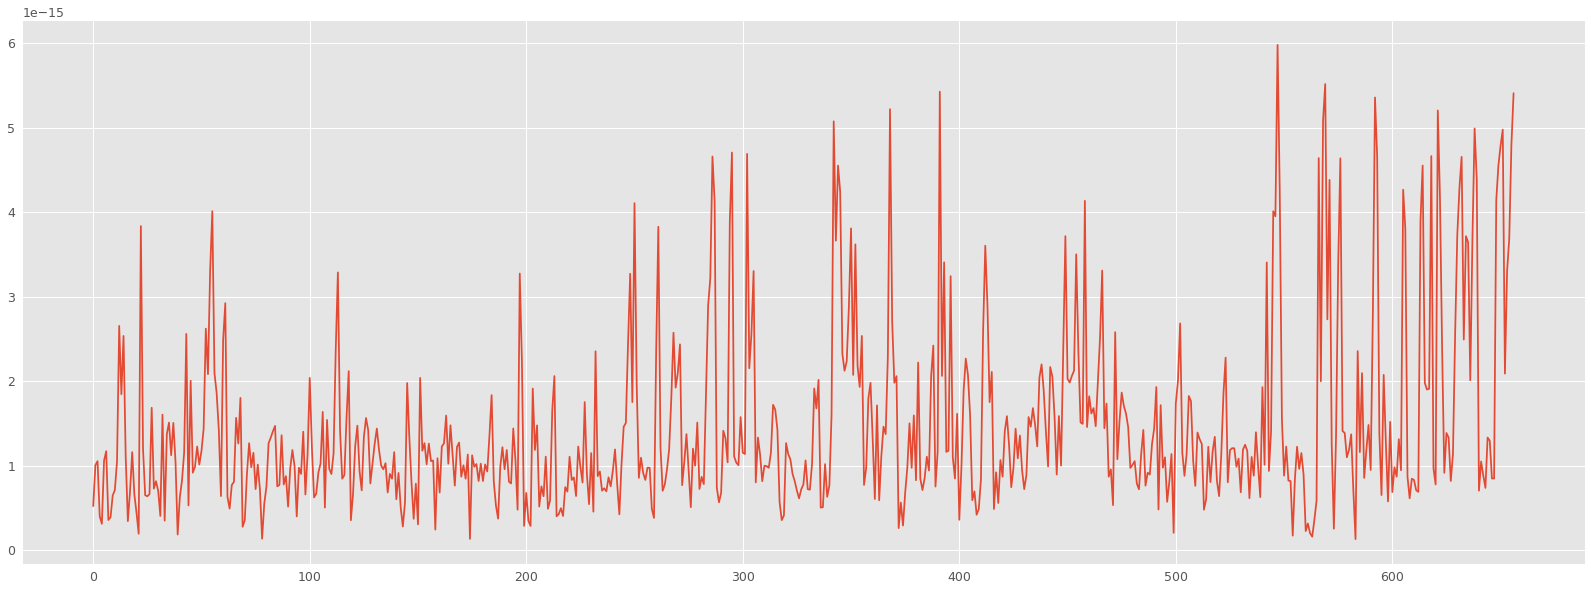

In [30]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(28,10))
    plt.plot(error_e_test)

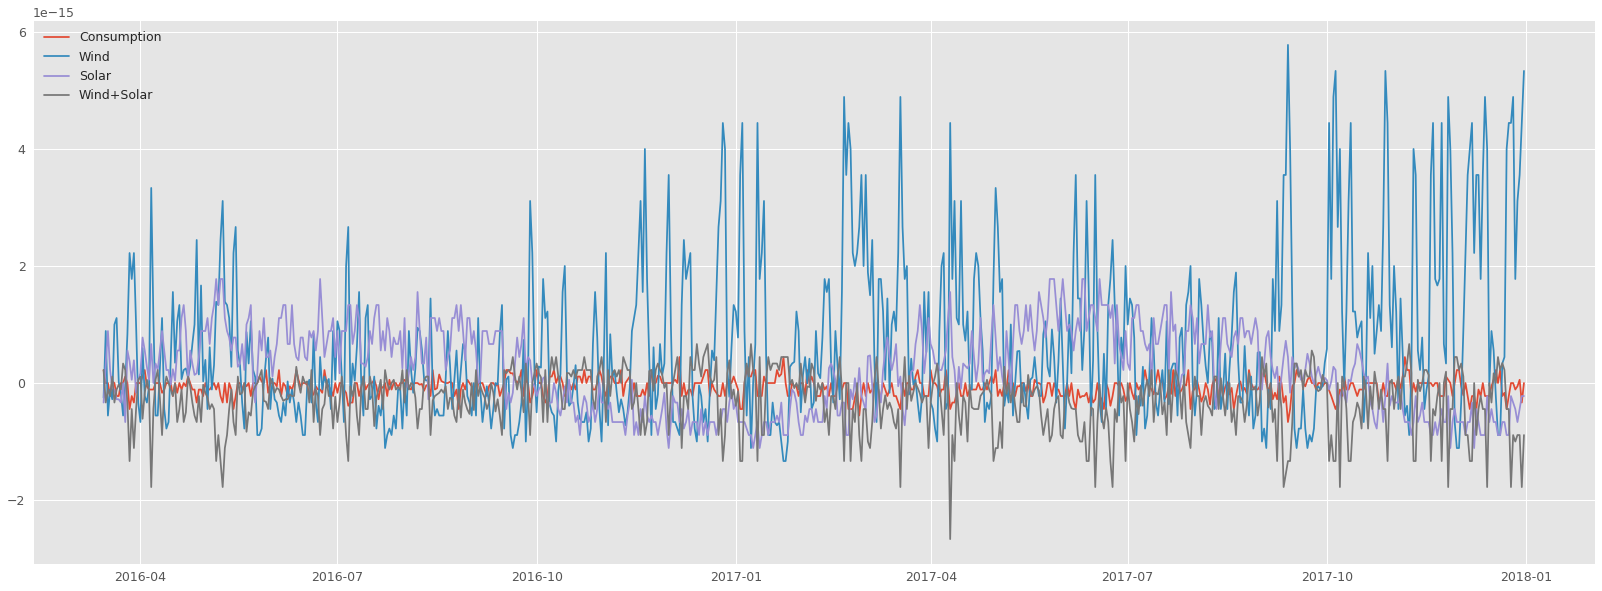

In [31]:
#X=X_projected_test.T
with plt.style.context('ggplot'):
    plt.figure(figsize=(28,10))
    plt.plot(X_test-X_projected_test)
    plt.legend(X_test-X_projected_test)

In [32]:
KPCA = KernelPCA(n_components=3, kernel='rbf', fit_inverse_transform=True) #parametro per gamma
X_train_kpca = KPCA.fit_transform(X_train)
X_projected_kpca = KPCA.inverse_transform(X_train_kpca)
error_e_train = recostruction_error(X_train, X_projected_kpca)

In [33]:
X_test_kpca = KPCA.transform(X_test)
X_projected_test_kpca = KPCA.inverse_transform(X_test_kpca)
error_e_test = recostruction_error(X_test, X_projected_test_kpca)

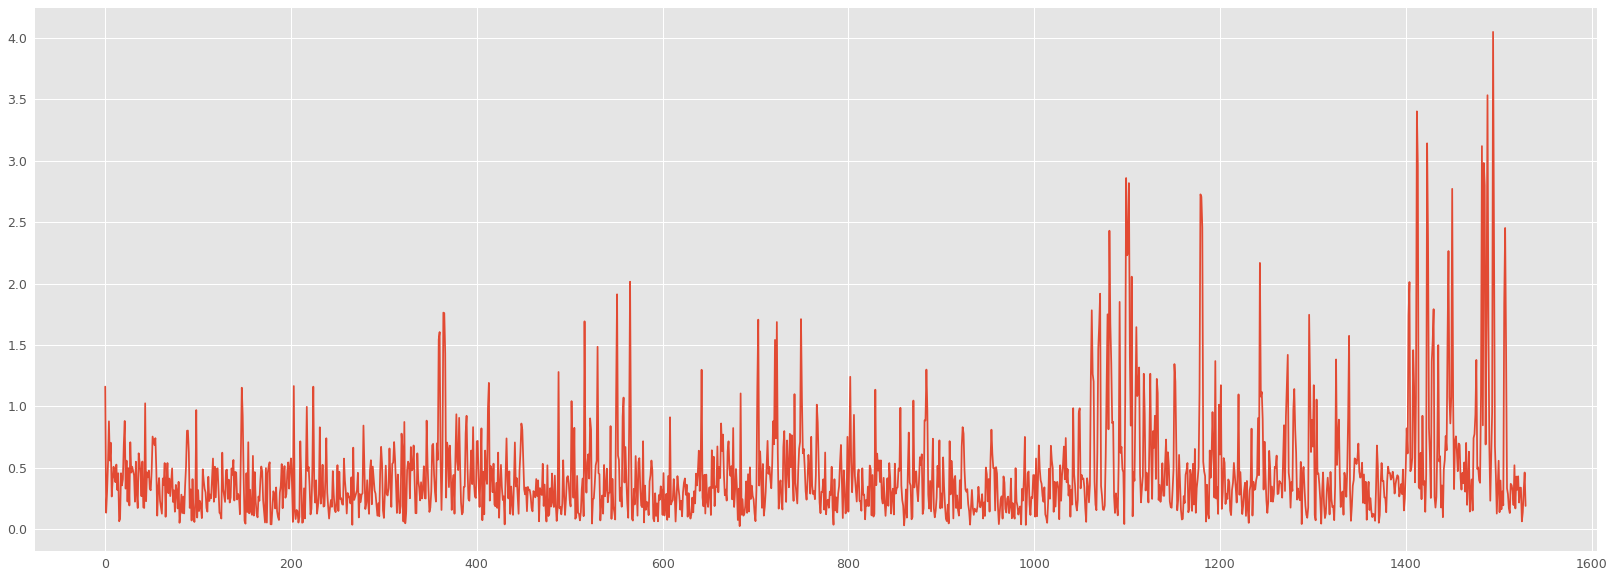

In [34]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(28,10))
    plt.plot(error_e_train)

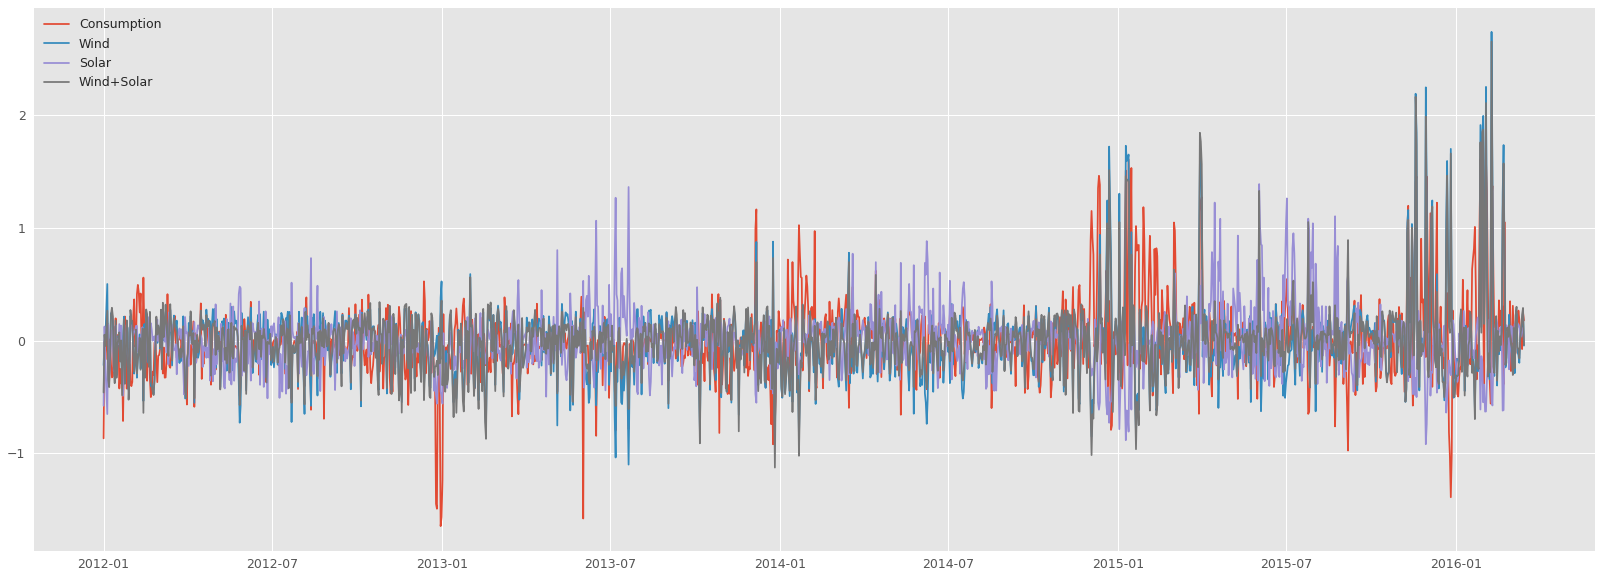

In [35]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(28,10))
    plt.plot(X_train-X_projected_kpca)
    plt.legend(X_test)

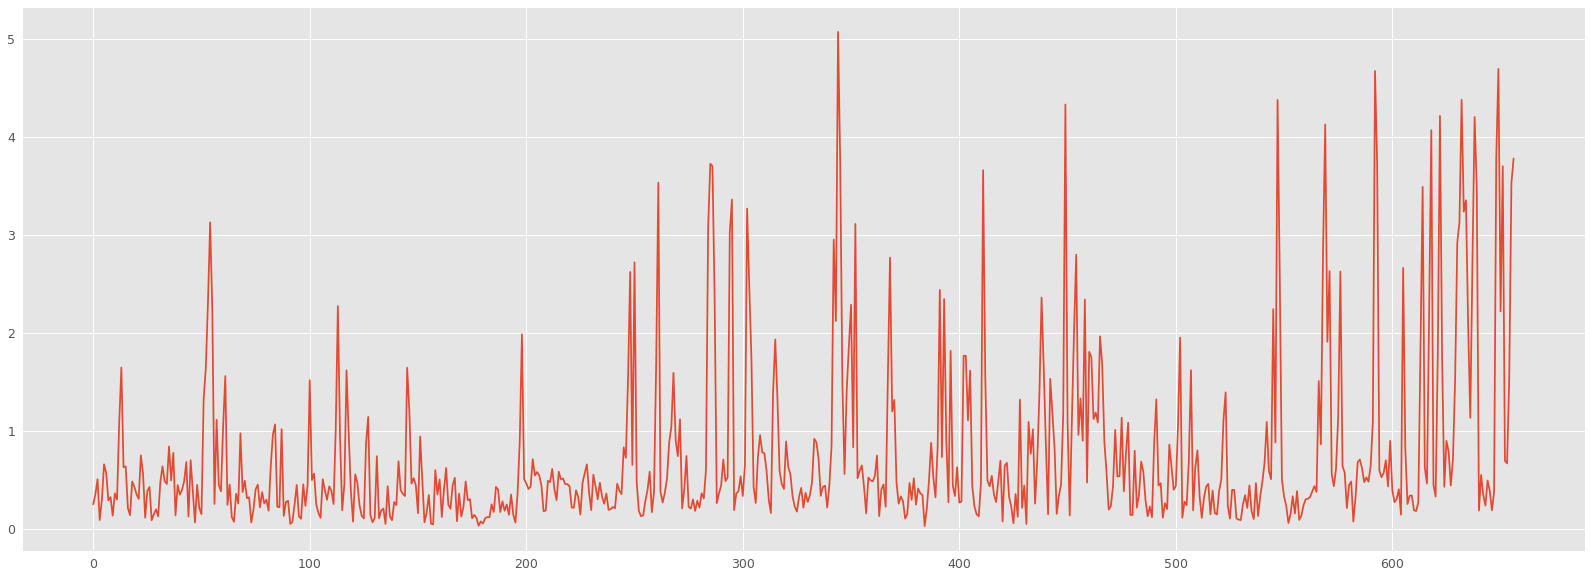

In [36]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(28,10))
    plt.plot(error_e_test)

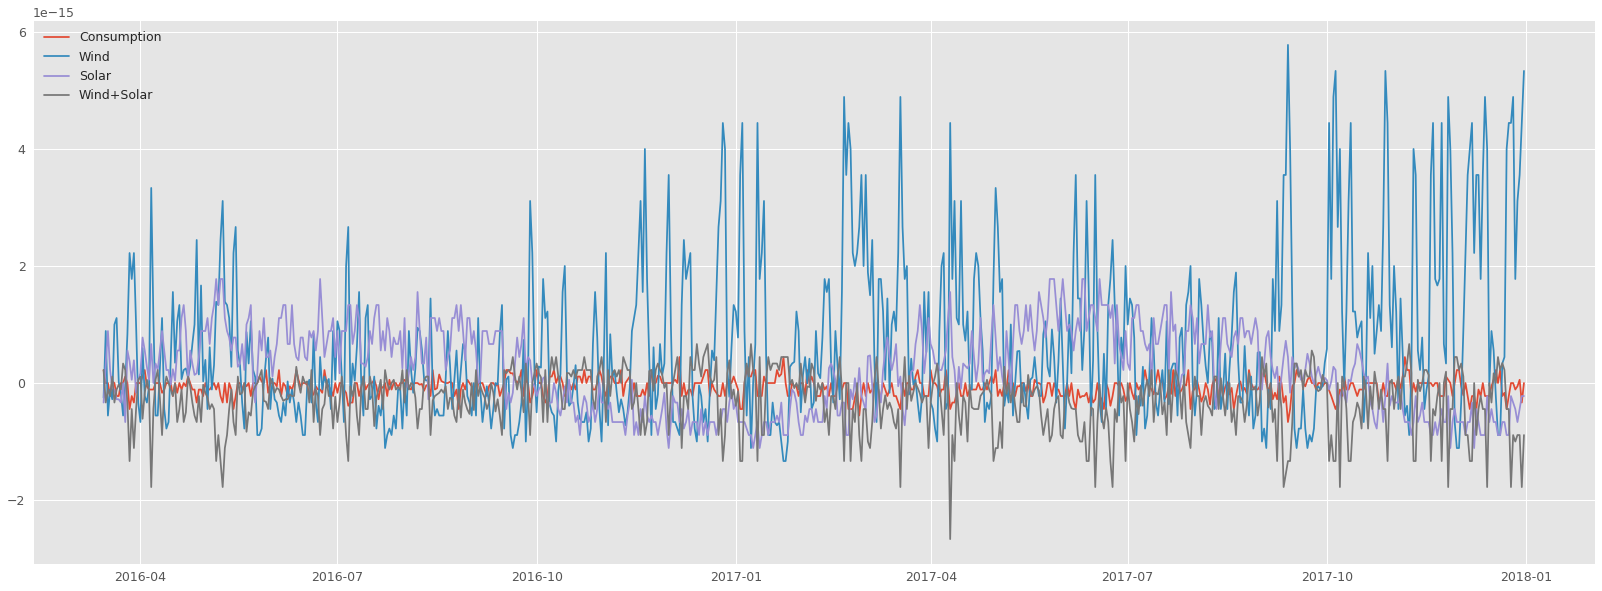

In [37]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(28,10))
    plt.plot(X_test-X_projected_test)
    plt.legend(X_test-X_projected_test)

In [38]:
AE = AutoEncoder(num_features=X_train.shape[1], num_latent_node = X_train.shape[1],activation_fun='relu',  lamda = 0.001)
AE.model_settings()
AE.setting_train_test_DS(X_train, X_test)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [39]:
type(X_train)

pandas.core.frame.DataFrame

In [40]:
AE.fit(epochs=50)

Epoch 1/50
1530/1530 [==============================] - 0s 200us/sample - loss: 0.9624
Epoch 2/50
1530/1530 [==============================] - 0s 44us/sample - loss: 0.7526
Epoch 3/50
1530/1530 [==============================] - 0s 44us/sample - loss: 0.6442
Epoch 4/50
1530/1530 [==============================] - 0s 44us/sample - loss: 0.5503
Epoch 5/50
1530/1530 [==============================] - 0s 43us/sample - loss: 0.4640
Epoch 6/50
1530/1530 [==============================] - 0s 43us/sample - loss: 0.3926
Epoch 7/50
1530/1530 [==============================] - 0s 45us/sample - loss: 0.3383
Epoch 8/50
1530/1530 [==============================] - 0s 42us/sample - loss: 0.2976
Epoch 9/50
1530/1530 [==============================] - 0s 46us/sample - loss: 0.2663
Epoch 10/50
1530/1530 [==============================] - 0s 44us/sample - loss: 0.2414
Epoch 11/50
1530/1530 [==============================] - 0s 48us/sample - loss: 0.2205
Epoch 12/50
1530/1530 [============================

In [41]:
rec_rep = AE.predict_test()

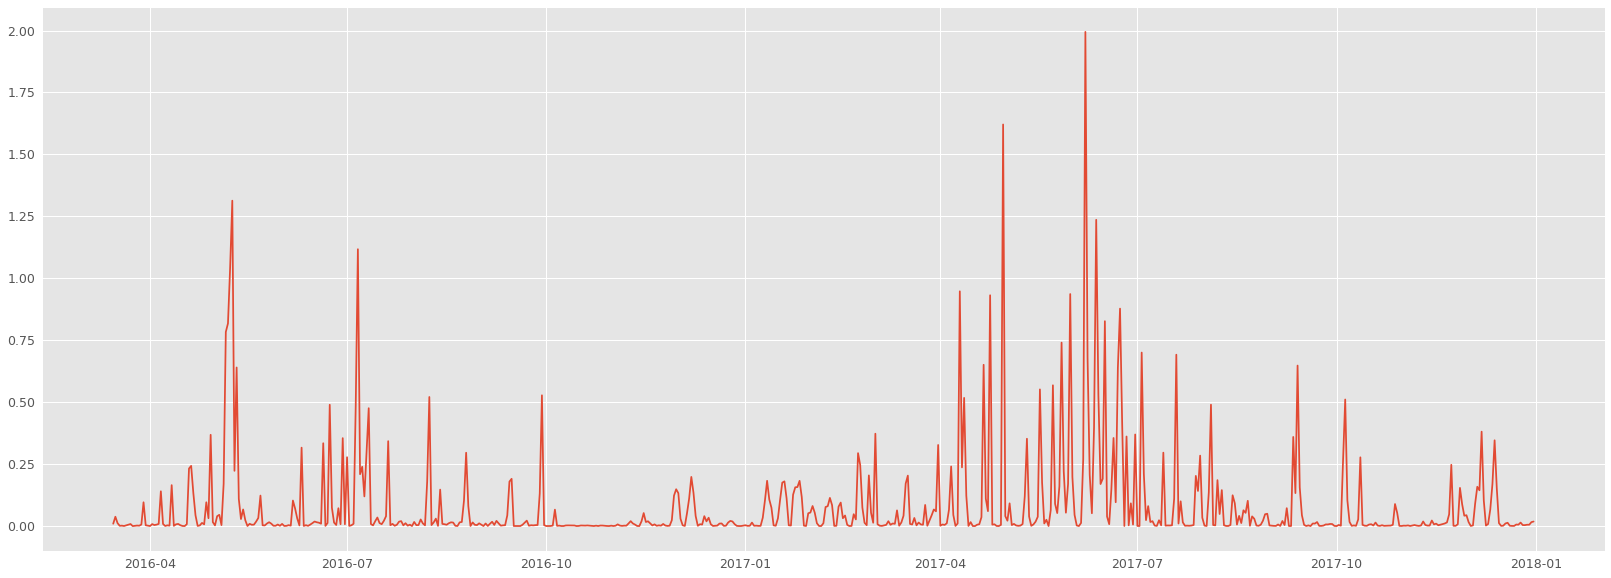

In [42]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(28,10))
    plt.plot(AE.get_error_recustruction_test())

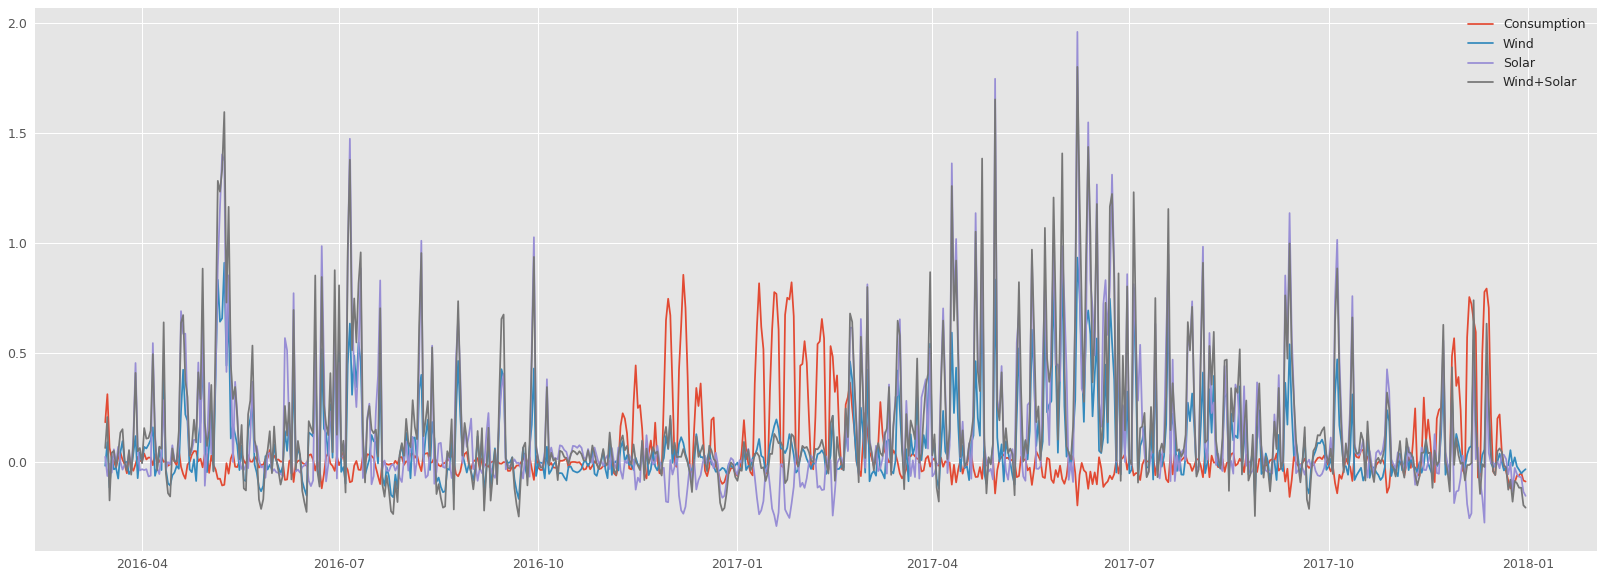

In [43]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(28,10))
    plt.plot(X_test-rec_rep)
    plt.legend(X_test-rec_rep)

In [45]:
np.random.seed(42)
AE_denoising = AutoEncoder(num_features=X_train.shape[1],num_latent_node=8, lamda = 0.001)
AE_denoising.model_settings()
#X_train_noise = random_noise(X_train, mode='pepper')
#gaussian_noises = np.random.normal(0,1,size=X_train.shape)
X_train_noise = noisy.noisy("s&p" ,X_train)
AE_denoising.setting_train_test_DS(X_train_noise, X_test)

/home/ec2-user/SageMaker/MASL_project_2019/progetto/lib/noisy.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
/home/ec2-user/SageMaker/MASL_project_2019/progetto/lib/noisy.py:28: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


In [46]:
AE_denoising.fit(epochs=50)
rec_rep = AE_denoising.predict_test()

Epoch 1/50
1530/1530 [==============================] - 0s 214us/sample - loss: 0.5094
Epoch 2/50
1530/1530 [==============================] - 0s 45us/sample - loss: 0.3401
Epoch 3/50
1530/1530 [==============================] - 0s 47us/sample - loss: 0.2709
Epoch 4/50
1530/1530 [==============================] - 0s 45us/sample - loss: 0.2299
Epoch 5/50
1530/1530 [==============================] - 0s 46us/sample - loss: 0.1993
Epoch 6/50
1530/1530 [==============================] - 0s 45us/sample - loss: 0.1736
Epoch 7/50
1530/1530 [==============================] - 0s 43us/sample - loss: 0.1508
Epoch 8/50
1530/1530 [==============================] - 0s 44us/sample - loss: 0.1305
Epoch 9/50
1530/1530 [==============================] - 0s 44us/sample - loss: 0.1125
Epoch 10/50
1530/1530 [==============================] - 0s 44us/sample - loss: 0.0968
Epoch 11/50
1530/1530 [==============================] - 0s 43us/sample - loss: 0.0833
Epoch 12/50
1530/1530 [============================

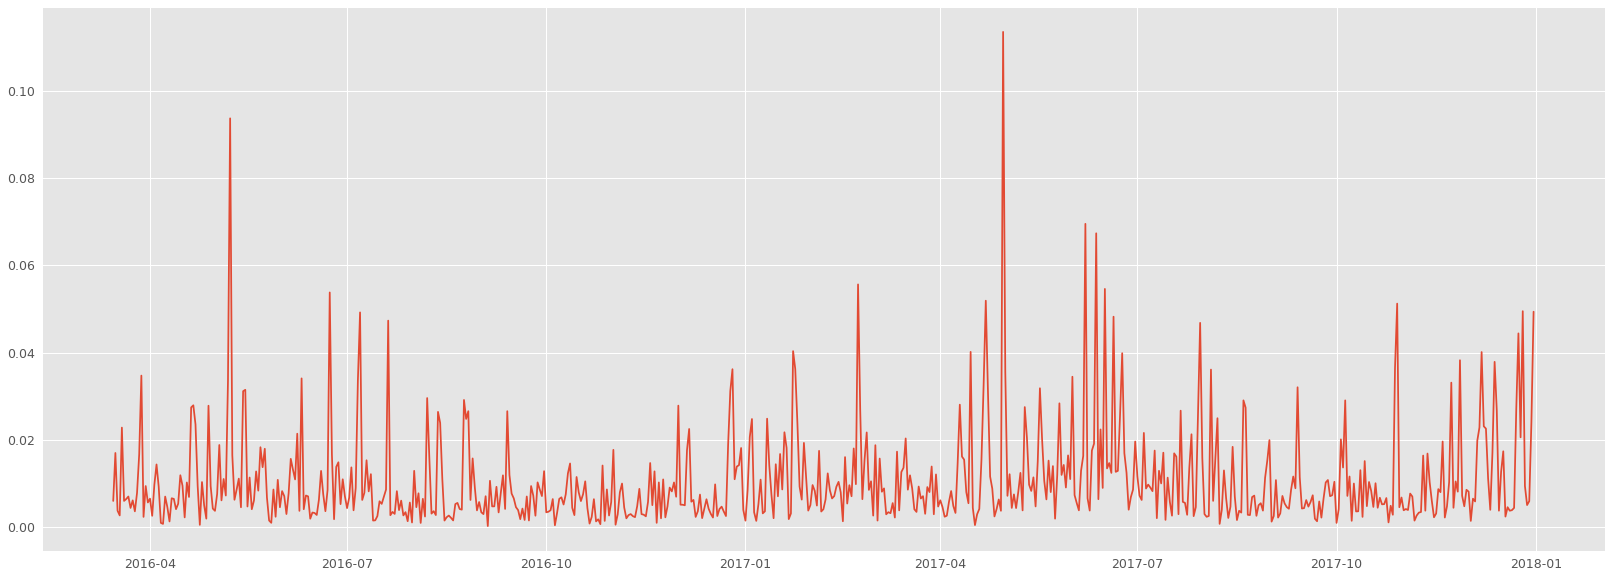

In [47]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(28,10))
    plt.plot(AE_denoising.get_error_recustruction_test())

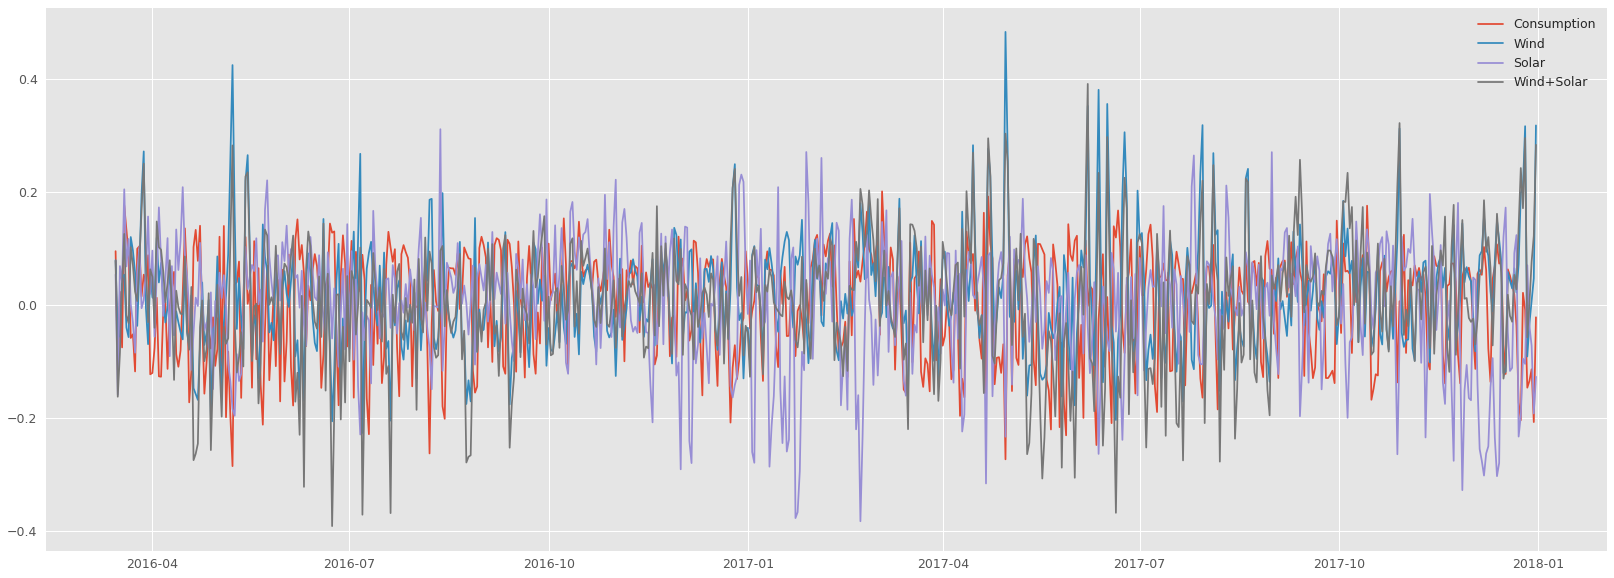

In [48]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(28,10))
    plt.plot(X_test-rec_rep)
    plt.legend(X_test-rec_rep)